## 1) Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## 2) Importing datasets

In [ ]:
df_train=pd.read_csv("/content/train.csv")
df_test=pd.read_csv("/content/test.csv")

In [ ]:
df_train.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


## 3) Exploratory Data Analysis

In [ ]:
df_train.isna().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64

In [ ]:
df_test.isna().sum()

tracking_id                         0
datetime                            0
wind_speed(m/s)                   126
atmospheric_temperature(°C)      1427
shaft_temperature(°C)               1
blades_angle(°)                   106
gearbox_temperature(°C)             1
engine_temperature(°C)              5
motor_torque(N-m)                  11
generator_temperature(°C)           5
atmospheric_pressure(Pascal)     1151
area_temperature(°C)                1
windmill_body_temperature(°C)     926
wind_direction(°)                2160
resistance(ohm)                     0
rotor_torque(N-m)                 281
turbine_status                    797
cloud_level                       125
blade_length(m)                  2114
blade_breadth(m)                    0
windmill_height(m)                255
dtype: int64

In [ ]:
df_train.corr()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
wind_speed(m/s),1.000000,0.052363,0.038500,-0.003593,0.016240,0.154659,0.377897,0.427604,-0.121641,0.198772,0.028000,0.045681,0.236767,0.152735,0.006996,0.003903,-0.011933,0.062754
atmospheric_temperature(°C),0.052363,1.000000,0.011944,0.007429,0.005955,0.050748,0.095394,0.117335,-0.023382,0.073553,0.008472,0.018082,0.061556,0.044131,0.000567,0.003729,0.001270,-0.001005
shaft_temperature(°C),0.038500,0.011944,1.000000,-0.009692,0.029967,0.204034,0.071366,0.074695,-0.018744,0.087570,0.018121,0.020066,0.032219,0.027989,0.000145,-0.006120,-0.008823,0.046552
blades_angle(°),-0.003593,0.007429,-0.009692,1.000000,-0.025215,-0.064848,-0.138646,-0.044344,0.009316,-0.076014,0.003258,-0.027141,-0.033415,-0.048541,-0.009242,-0.061279,0.002717,-0.154808
gearbox_temperature(°C),0.016240,0.005955,0.029967,-0.025215,1.000000,0.132756,0.045057,0.045125,-0.008589,0.058875,0.017249,0.029088,0.021098,0.016662,-0.002677,0.011283,0.003853,0.053192
engine_temperature(°C),0.154659,0.050748,0.204034,-0.064848,0.132756,1.000000,0.352509,0.360616,-0.061328,0.342259,0.089745,0.137448,0.208365,0.138721,-0.007294,0.011560,-0.011952,0.272597
motor_torque(N-m),0.377897,0.095394,0.071366,-0.138646,0.045057,0.352509,1.000000,0.934950,-0.215039,0.475887,0.028134,0.212269,0.513372,0.390499,0.005023,0.052973,0.001177,0.505553
generator_temperature(°C),0.427604,0.117335,0.074695,-0.044344,0.045125,0.360616,0.934950,1.000000,-0.238989,0.517243,0.036341,0.212498,0.539554,0.371918,0.005362,0.017573,-0.000638,0.391820
atmospheric_pressure(Pascal),-0.121641,-0.023382,-0.018744,0.009316,-0.008589,-0.061328,-0.215039,-0.238989,1.000000,-0.091428,-0.009015,-0.028435,-0.128475,-0.093835,0.005462,0.005022,0.002784,-0.013310
area_temperature(°C),0.198772,0.073553,0.087570,-0.076014,0.058875,0.342259,0.475887,0.517243,-0.091428,1.000000,0.050754,0.200037,0.266673,0.187335,0.000074,0.022397,-0.005301,0.384564


In [ ]:
df_test.corr()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m)
wind_speed(m/s),1.000000,0.061187,0.027325,0.009194,0.010547,0.147892,0.369842,0.419976,-0.106615,0.200528,0.001017,0.044018,0.217924,0.152701,-0.003779,-0.016153,0.011698
atmospheric_temperature(°C),0.061187,1.000000,0.012134,0.010324,-0.005487,0.056438,0.098146,0.114446,-0.030225,0.082765,0.012329,0.004027,0.054188,0.032366,-0.004935,0.002246,0.011049
shaft_temperature(°C),0.027325,0.012134,1.000000,-0.025415,0.037180,0.200446,0.080303,0.080127,-0.027651,0.087248,0.021840,0.039934,0.053308,0.031859,-0.006911,0.013926,-0.000883
blades_angle(°),0.009194,0.010324,-0.025415,1.000000,-0.018243,-0.069266,-0.131362,-0.037829,-0.008173,-0.077478,-0.008150,-0.034579,-0.017502,-0.056359,0.002696,-0.065764,-0.014814
gearbox_temperature(°C),0.010547,-0.005487,0.037180,-0.018243,1.000000,0.136387,0.065664,0.069072,-0.029547,0.050061,0.010181,0.024724,0.037056,0.027443,-0.009520,0.006441,-0.014618
engine_temperature(°C),0.147892,0.056438,0.200446,-0.069266,0.136387,1.000000,0.354606,0.365804,-0.073252,0.354300,0.084279,0.148681,0.194904,0.159455,0.012662,0.008678,0.004803
motor_torque(N-m),0.369842,0.098146,0.080303,-0.131362,0.065664,0.354606,1.000000,0.934491,-0.211487,0.478639,0.025983,0.228838,0.500819,0.394186,0.007091,0.043081,0.019871
generator_temperature(°C),0.419976,0.114446,0.080127,-0.037829,0.069072,0.365804,0.934491,1.000000,-0.235844,0.526082,0.032975,0.228575,0.523324,0.375879,0.005954,0.003661,0.012929
atmospheric_pressure(Pascal),-0.106615,-0.030225,-0.027651,-0.008173,-0.029547,-0.073252,-0.211487,-0.235844,1.000000,-0.086137,-0.022924,-0.019840,-0.119625,-0.085196,0.003919,0.010792,-0.024129
area_temperature(°C),0.200528,0.082765,0.087248,-0.077478,0.050061,0.354300,0.478639,0.526082,-0.086137,1.000000,0.039818,0.201476,0.268115,0.195786,0.002842,0.004143,0.008856


## 3a) Numerical and Categorical Data Split

In [ ]:
def splitFeatures(df):
    numerical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

numerical_features,categorical_features=splitFeatures(df_train)
numerical_features

<ipython-input-8-908167ee8cec>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object])


,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,2.217542,0.314065,24.281689,6.766521
1,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,4.210346,0.448494,27.262139,5.966275
2,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,2.719475,0.302321,27.366127,2.874342
3,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,4.857385,0.367140,24.287767,14.851089
4,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,NaN,0.453374,27.971650,3.519074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,94.765699,23.576793,45.399352,5.377222,-1.085171,48.528248,2791.600990,90.898875,19428.725079,45.429230,44.242269,536.153413,1980.861921,45.909054,2.774335,0.418299,24.590801,9.587934
28196,94.196738,24.034329,42.068979,-99.000000,44.285153,43.487939,2207.882276,72.244645,16596.485400,25.142681,43.616412,354.239825,1712.840457,36.974913,-3.250989,0.461531,26.051604,4.522195
28197,94.160463,28.674296,45.004213,9.550358,49.377706,44.042632,2801.657374,94.814637,19083.881449,45.129442,43.576510,534.209913,1951.728713,88.319152,NaN,0.380264,28.533850,11.096599
28198,95.430377,26.560254,48.032624,3.051389,81.443896,44.821365,2760.647280,90.144418,18360.785707,45.603927,44.973415,568.504898,1968.917692,47.562627,3.001855,0.346447,47.747269,9.373239


In [ ]:
categorical_features

,tracking_id,datetime,turbine_status,cloud_level
0,WM_33725,2019-08-04 14:33:20,BA,Medium
1,WM_698,2018-11-05 10:13:20,A2,Medium
2,WM_39146,2019-09-14 14:03:20,ABC,Medium
3,WM_6757,2018-12-25 15:33:20,ABC,NaN
4,WM_21521,2019-05-04 03:13:20,AAA,Medium
...,...,...,...,...
28195,WM_7814,2019-01-02 02:43:20,BB,Medium
28196,WM_32512,2019-07-26 12:53:20,BB,Low
28197,WM_5193,2018-12-12 02:13:20,D,Medium
28198,WM_12173,2019-02-03 19:13:20,BCB,Low


In [ ]:
df_cpy = df_train.copy()

## 3b) Plotting graph between various features to find pattern

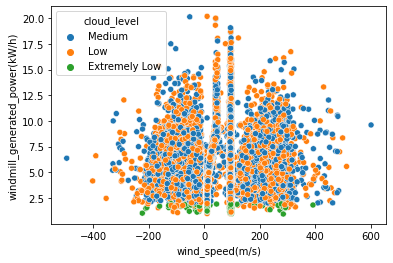

In [ ]:
sns.scatterplot(x='wind_speed(m/s)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

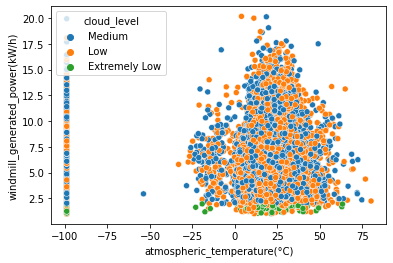

In [ ]:
sns.scatterplot(x='atmospheric_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

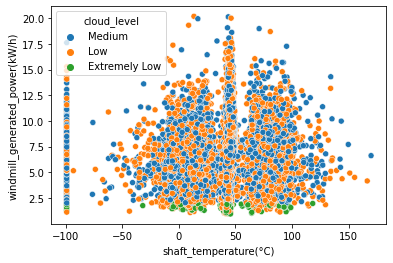

In [ ]:
sns.scatterplot(x='shaft_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

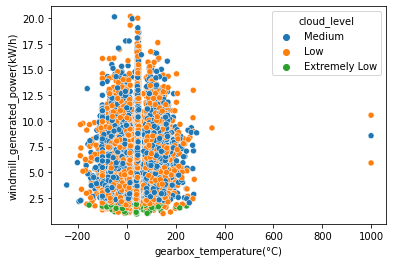

In [ ]:
sns.scatterplot(x='gearbox_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

## 3c) Dropping the Outliers

In [ ]:
low = df_cpy['gearbox_temperature(°C)'] < -200
high = df_cpy['gearbox_temperature(°C)'] > 300
low = np.where(low)
high = np.where(high)
df_cpy.drop(low[0],inplace=True)
df_cpy.drop(high[0],inplace=True)
df_cpy.index = range(df_cpy.shape[0])


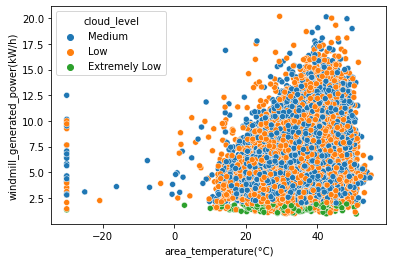

In [ ]:
sns.scatterplot(x='area_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

##

In [ ]:
low = df_cpy['area_temperature(°C)'] < 10
low = np.where(low)
df_cpy.drop(low[0],inplace=True)
df_cpy.index = range(df_cpy.shape[0])

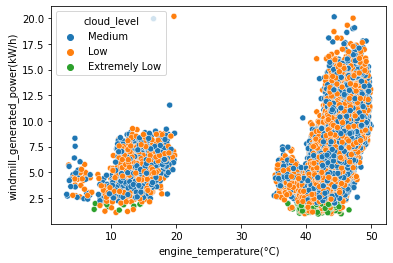

In [ ]:
sns.scatterplot(x='engine_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

In [ ]:
low = df_cpy['engine_temperature(°C)'] < 38
low = np.where(low)
df_cpy.drop(low[0],inplace=True)
df_cpy.index = range(df_cpy.shape[0])

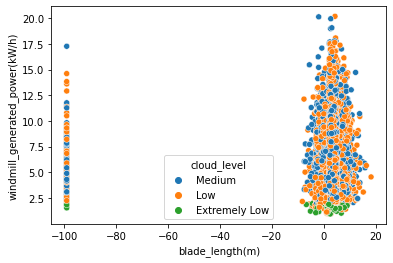

In [ ]:
sns.scatterplot(x='blade_length(m)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df_train)

In [ ]:
low = df_cpy['blade_length(m)'] < -20
low = np.where(low)
df_cpy.drop(low[0],inplace=True)
df_cpy.index = range(df_cpy.shape[0])

In [ ]:
df_cpy.drop(['generator_temperature(°C)','windmill_body_temperature(°C)'],inplace=True,axis=1)
df_test.drop(['generator_temperature(°C)','windmill_body_temperature(°C)'],inplace=True,axis=1)
df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26561 entries, 0 to 26560
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     26561 non-null  object 
 1   datetime                        26561 non-null  object 
 2   wind_speed(m/s)                 26304 non-null  float64
 3   atmospheric_temperature(°C)     23329 non-null  float64
 4   shaft_temperature(°C)           26559 non-null  float64
 5   blades_angle(°)                 26361 non-null  float64
 6   gearbox_temperature(°C)         26560 non-null  float64
 7   engine_temperature(°C)          26560 non-null  float64
 8   motor_torque(N-m)               26553 non-null  float64
 9   atmospheric_pressure(Pascal)    24035 non-null  float64
 10  area_temperature(°C)            26561 non-null  float64
 11  wind_direction(°)               21601 non-null  float64
 12  resistance(ohm)                 

## 4) Data Preparation

## 4a) Replacing missing values with mean and mode value

In [ ]:
df_cpy['gearbox_temperature(°C)'].fillna(df_cpy['gearbox_temperature(°C)'].mean(),inplace=True)
df_cpy['area_temperature(°C)'].fillna(df_cpy['area_temperature(°C)'].mean(),inplace=True)
df_cpy['rotor_torque(N-m)'].fillna(df_cpy['rotor_torque(N-m)'].mean(),inplace=True)
df_cpy['blade_length(m)'].fillna(df_cpy['blade_length(m)'].mean(),inplace=True)
df_cpy['blade_breadth(m)'].fillna(df_cpy['blade_breadth(m)'].mean(),inplace=True)
df_cpy['windmill_height(m)'].fillna(df_cpy['windmill_height(m)'].mean(),inplace=True)
df_cpy['cloud_level'].fillna(df_cpy['cloud_level'].mode()[0],inplace=True)
df_cpy['atmospheric_temperature(°C)'].fillna(df_cpy['atmospheric_temperature(°C)'].mean(),inplace=True)
df_cpy['atmospheric_pressure(Pascal)'].fillna(df_cpy['atmospheric_pressure(Pascal)'].mean(),inplace=True)
df_cpy['wind_speed(m/s)'].fillna(df_cpy['wind_speed(m/s)'].mean(),inplace=True)
df_cpy['shaft_temperature(°C)'].fillna(df_cpy['shaft_temperature(°C)'].mean(),inplace=True)
df_cpy['blades_angle(°)'].fillna(df_cpy['blades_angle(°)'].mean(),inplace=True)
df_cpy['engine_temperature(°C)'].fillna(df_cpy['engine_temperature(°C)'].mean(),inplace=True)
df_cpy['motor_torque(N-m)'].fillna(df_cpy['motor_torque(N-m)'].mean(),inplace=True)
df_cpy['wind_direction(°)'].fillna(df_cpy['wind_direction(°)'].mean(),inplace=True)
df_cpy['windmill_generated_power(kW/h)'].fillna(df_cpy['windmill_generated_power(kW/h)'].mean(),inplace=True)

In [ ]:
df_test['gearbox_temperature(°C)'].fillna(df_test['gearbox_temperature(°C)'].mean(),inplace=True)
df_test['area_temperature(°C)'].fillna(df_test['area_temperature(°C)'].mean(),inplace=True)
df_test['rotor_torque(N-m)'].fillna(df_test['rotor_torque(N-m)'].mean(),inplace=True)
df_test['blade_length(m)'].fillna(df_test['blade_length(m)'].mean(),inplace=True)
df_test['blade_breadth(m)'].fillna(df_test['blade_breadth(m)'].mean(),inplace=True)
df_test['windmill_height(m)'].fillna(df_test['windmill_height(m)'].mean(),inplace=True)
df_test['cloud_level'].fillna(df_test['cloud_level'].mode()[0],inplace=True)
df_test['atmospheric_temperature(°C)'].fillna(df_test['atmospheric_temperature(°C)'].mean(),inplace=True)
df_test['atmospheric_pressure(Pascal)'].fillna(df_test['atmospheric_pressure(Pascal)'].mean(),inplace=True)
df_test['wind_speed(m/s)'].fillna(df_test['wind_speed(m/s)'].mean(),inplace=True)
df_test['shaft_temperature(°C)'].fillna(df_test['shaft_temperature(°C)'].mean(),inplace=True)
df_test['blades_angle(°)'].fillna(df_test['blades_angle(°)'].mean(),inplace=True)
df_test['engine_temperature(°C)'].fillna(df_test['engine_temperature(°C)'].mean(),inplace=True)
df_test['motor_torque(N-m)'].fillna(df_test['motor_torque(N-m)'].mean(),inplace=True)
df_test['wind_direction(°)'].fillna(df_test['wind_direction(°)'].mean(),inplace=True)

In [ ]:
df_cpy.dropna(how='any',axis=0,inplace=True)
df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24907 entries, 0 to 26560
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     24907 non-null  object 
 1   datetime                        24907 non-null  object 
 2   wind_speed(m/s)                 24907 non-null  float64
 3   atmospheric_temperature(°C)     24907 non-null  float64
 4   shaft_temperature(°C)           24907 non-null  float64
 5   blades_angle(°)                 24907 non-null  float64
 6   gearbox_temperature(°C)         24907 non-null  float64
 7   engine_temperature(°C)          24907 non-null  float64
 8   motor_torque(N-m)               24907 non-null  float64
 9   atmospheric_pressure(Pascal)    24907 non-null  float64
 10  area_temperature(°C)            24907 non-null  float64
 11  wind_direction(°)               24907 non-null  float64
 12  resistance(ohm)                 

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tracking_id                   12086 non-null  object 
 1   datetime                      12086 non-null  object 
 2   wind_speed(m/s)               12086 non-null  float64
 3   atmospheric_temperature(°C)   12086 non-null  float64
 4   shaft_temperature(°C)         12086 non-null  float64
 5   blades_angle(°)               12086 non-null  float64
 6   gearbox_temperature(°C)       12086 non-null  float64
 7   engine_temperature(°C)        12086 non-null  float64
 8   motor_torque(N-m)             12086 non-null  float64
 9   atmospheric_pressure(Pascal)  12086 non-null  float64
 10  area_temperature(°C)          12086 non-null  float64
 11  wind_direction(°)             12086 non-null  float64
 12  resistance(ohm)               12086 non-null  float64
 13  r

## 4b) Encoding the Categorical Data

In [ ]:
df_cpy['cloud_level'].replace(['Medium', 'Low', 'Extremely Low'],[2,1,0],inplace=True)
df_test['cloud_level'].replace(['Medium', 'Low', 'Extremely Low'],[2,1,0],inplace=True)


In [ ]:
df_cpy['turbine_status'].value_counts()

AAA    1833
A      1830
B2     1826
BB     1815
BCB    1807
D      1794
B      1763
A2     1759
AC     1758
ABC    1757
BA     1752
AB     1752
BD     1736
BBB    1725
Name: turbine_status, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


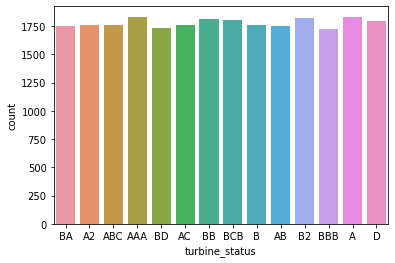

In [ ]:
sns.countplot(df_cpy['turbine_status'])

In [ ]:
dum = ['turbine_status']
df_dum = pd.get_dummies(df_cpy[dum])
df_test_dum = pd.get_dummies(df_test[dum])
df_dum

,turbine_status_A,turbine_status_A2,turbine_status_AAA,turbine_status_AB,turbine_status_ABC,turbine_status_AC,turbine_status_B,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26556,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26557,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26558,0,0,0,0,0,0,0,0,0,0,0,0,0,1
26559,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## 4c) Final Dataset for creating ML model

In [ ]:
df_cpy = pd.concat([df_cpy,df_dum],axis=1)
df_test = pd.concat([df_test,df_test_dum],axis=1)

In [ ]:
df_cpy = pd.concat([df_cpy,df_dum],axis=1)
df_test = pd.concat([df_test,df_test_dum],axis=1)

In [ ]:
X = df_cpy.drop(['tracking_id','datetime','windmill_generated_power(kW/h)','turbine_status'],axis=1)
Y = df_cpy['windmill_generated_power(kW/h)']
X_test = df_test.drop(['tracking_id','datetime','turbine_status'],axis=1)
print(X.shape,Y.shape)
print(X_test.shape)


(24907, 44) (24907,)
(12086, 44)


## 5) Creating the Machine Learning Model

## 5a) Linear Regression Training

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

## 5b) Random Forest Training

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

## 6) Testing and Comparision

In [ ]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
r2_tr_lr = r2_score(y_true=y_train,y_pred=y_train_pred)
r2_te_lr = r2_score(y_true=y_test,y_pred=y_test_pred)
print("r2 score for linear regression training set:",r2_tr_lr)
print("r2 score for linear regression testing set:",r2_te_lr)

y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
r2_tr_rf = r2_score(y_train,y_train_pred)
r2_te_rf = r2_score(y_test,y_test_pred)
print("r2 score for random forest training set:",r2_tr_rf)
print("r2 score for random forest testing set:",r2_te_rf)

r2 score for linear regression training set: 0.4889632853957222
r2 score for linear regression testing set: 0.4956727788573303
r2 score for random forest training set: 0.9929041153821736
r2 score for random forest testing set: 0.9530458545895141


Text(0.5, 1.0, 'Comparing Models')

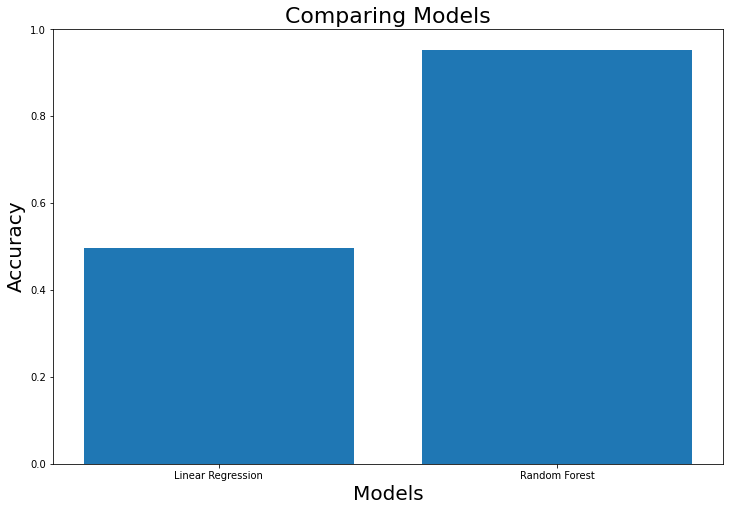

In [ ]:
plt.figure(figsize=(12,8))
labels = ['Linear Regression',"Random Forest"]
score = [r2_te_lr,r2_te_rf]
plt.bar(labels,score)
plt.xlabel("Models",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.title("Comparing Models",fontsize=22)

From this we can conclude that the random forest model performs better in comparision to the linear regression model.